In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df['target'] = iris.target

print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


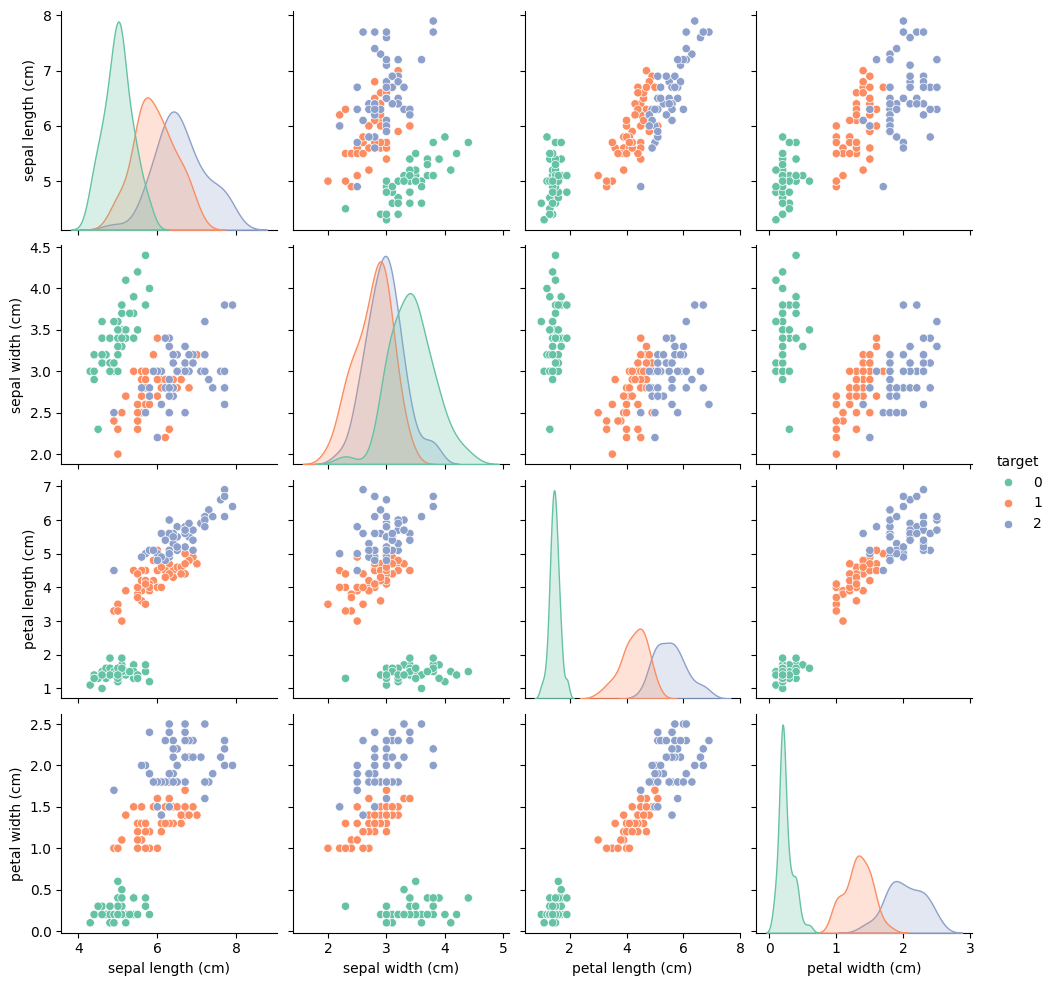

In [4]:
sns.pairplot(df, hue="target", palette="Set2")
plt.show()

In [6]:
X_original = iris.data

# Normalization (Min-Max Scaling)
scaler_norm = MinMaxScaler()
X_norm = scaler_norm.fit_transform(X_original)

# Transformation (Standardization)
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_original)

# PCA on original data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_original)

# T + N (Standardization + Normalization)
X_std_then_norm = scaler_norm.fit_transform(X_std)

# T + N + PCA
X_std_norm_pca = pca.fit_transform(X_std_then_norm)

# Store all versions in a dictionary for easy access
preprocessed_versions = {
    "No Processing": X_original,
    "Normalization": X_norm,
    "Transform (StandardScaler)": X_std,
    "PCA only": X_pca,
    "T + N": X_std_then_norm,
    "T + N + PCA": X_std_norm_pca
}

print("Preprocessing complete. Versions available:", list(preprocessed_versions.keys()))

Preprocessing complete. Versions available: ['No Processing', 'Normalization', 'Transform (StandardScaler)', 'PCA only', 'T + N', 'T + N + PCA']


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [8]:
kmeans_results = {}

cluster_range = [3, 4, 5]

for name, data in preprocessed_versions.items():
    print(f"\nProcessing: {name}")
    kmeans_results[name] = {}

    for k in cluster_range:
        try:
            kmeans = KMeans(n_clusters=k, random_state=42)
            labels = kmeans.fit_predict(data)

            sil_score = silhouette_score(data, labels)
            ch_score = calinski_harabasz_score(data, labels)
            db_score = davies_bouldin_score(data, labels)

            kmeans_results[name][k] = {
                "Silhouette": round(sil_score, 3),
                "Calinski-Harabasz": round(ch_score, 2),
                "Davies-Bouldin": round(db_score, 3)
            }

            print(f"k={k} → Silhouette: {sil_score:.3f}, CH: {ch_score:.2f}, DB: {db_score:.3f}")

        except Exception as e:
            print(f"Error with {name}, k={k}: {e}")
            kmeans_results[name][k] = {
                "Silhouette": "NA", "Calinski-Harabasz": "NA", "Davies-Bouldin": "NA"
            }


Processing: No Processing
k=3 → Silhouette: 0.551, CH: 561.59, DB: 0.666
k=4 → Silhouette: 0.498, CH: 529.53, DB: 0.754
k=5 → Silhouette: 0.493, CH: 495.24, DB: 0.819

Processing: Normalization
k=3 → Silhouette: 0.483, CH: 351.30, DB: 0.787
k=4 → Silhouette: 0.444, CH: 313.89, DB: 0.908
k=5 → Silhouette: 0.423, CH: 263.17, DB: 0.993

Processing: Transform (StandardScaler)
k=3 → Silhouette: 0.480, CH: 157.36, DB: 0.789
k=4 → Silhouette: 0.385, CH: 206.68, DB: 0.870
k=5 → Silhouette: 0.345, CH: 202.64, DB: 0.944

Processing: PCA only
k=3 → Silhouette: 0.598, CH: 693.71, DB: 0.565
k=4 → Silhouette: 0.558, CH: 719.12, DB: 0.615
k=5 → Silhouette: 0.510, CH: 642.06, DB: 0.753

Processing: T + N
k=3 → Silhouette: 0.483, CH: 351.30, DB: 0.787
k=4 → Silhouette: 0.444, CH: 313.89, DB: 0.908
k=5 → Silhouette: 0.423, CH: 263.17, DB: 0.993

Processing: T + N + PCA
k=3 → Silhouette: 0.565, CH: 473.63, DB: 0.609
k=4 → Silhouette: 0.527, CH: 450.92, DB: 0.683
k=5 → Silhouette: 0.506, CH: 387.54, DB: 


Visualizing clusters for: No Processing


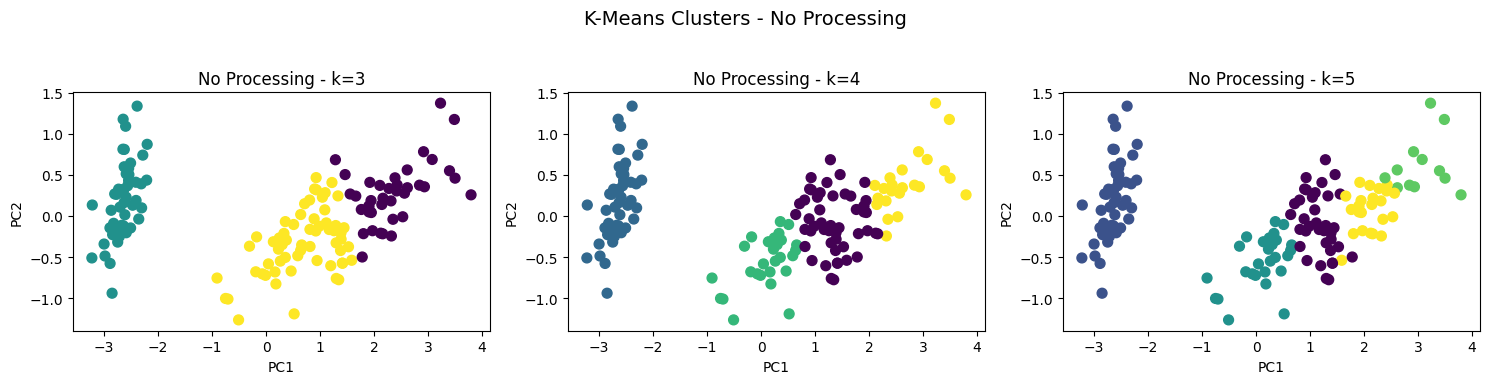


Visualizing clusters for: Normalization


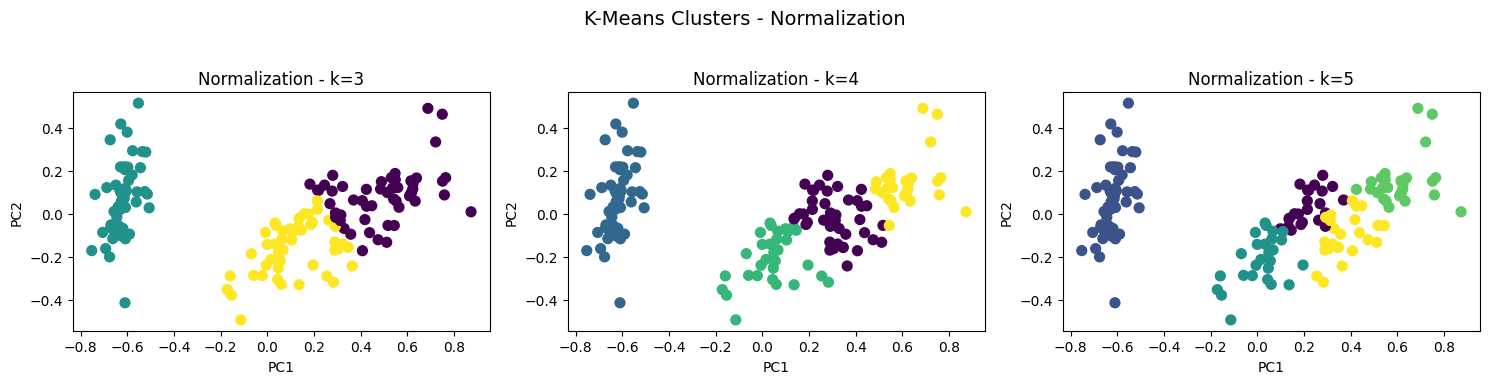


Visualizing clusters for: Transform (StandardScaler)


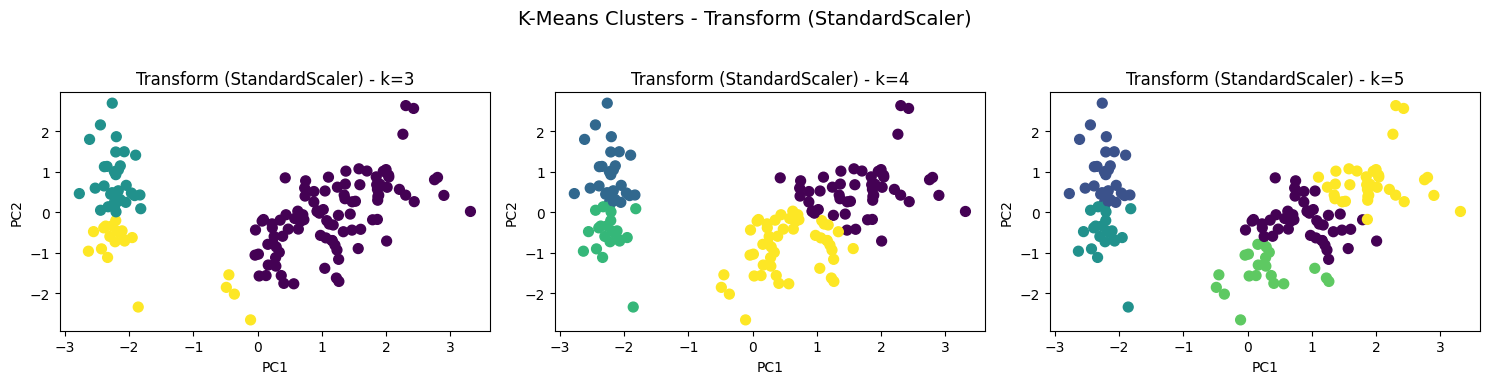


Visualizing clusters for: PCA only


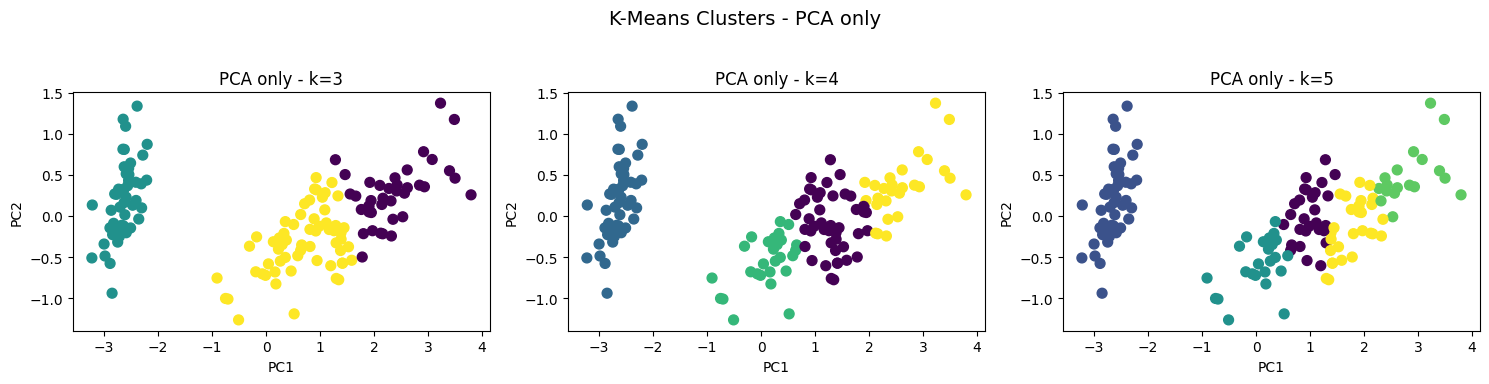


Visualizing clusters for: T + N


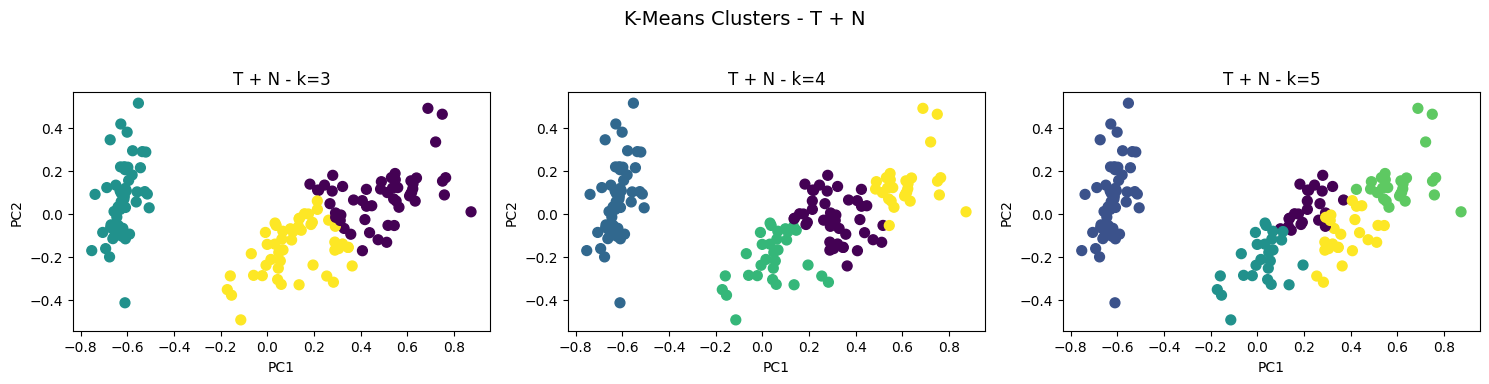


Visualizing clusters for: T + N + PCA


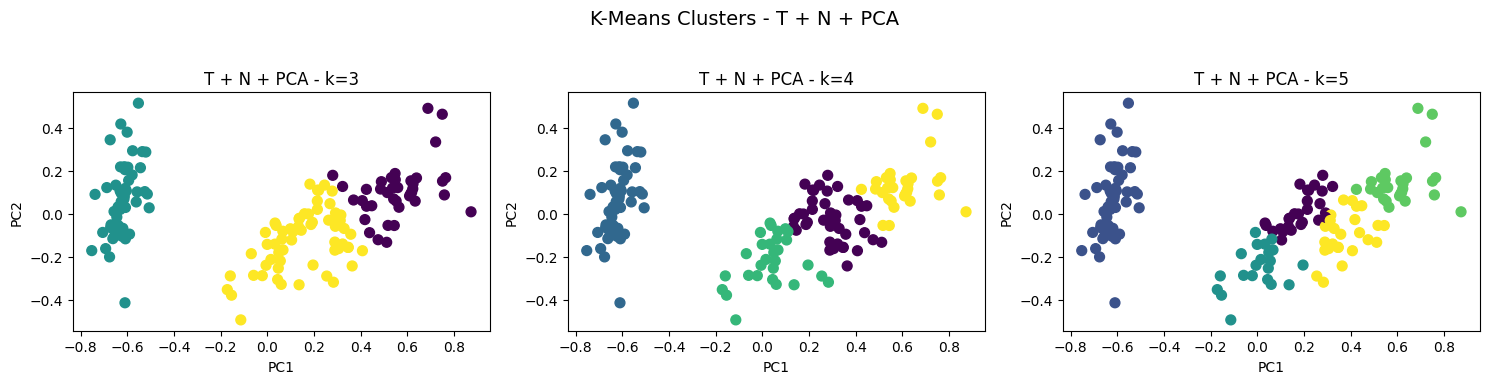

In [10]:
pca_2d = PCA(n_components=2)

def plot_all_clusters(preprocessed_versions, cluster_range=[3, 4, 5]):
    for name, data in preprocessed_versions.items():
        print(f"\nVisualizing clusters for: {name}")
        fig, axes = plt.subplots(1, 3, figsize=(15, 4))

        for i, k in enumerate(cluster_range):
            try:
                kmeans = KMeans(n_clusters=k, random_state=42)
                labels = kmeans.fit_predict(data)

                if data.shape[1] != 2:
                    data_2d = pca_2d.fit_transform(data)
                else:
                    data_2d = data

                # Plot
                axes[i].scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', s=50)
                axes[i].set_title(f"{name} - k={k}")
                axes[i].set_xlabel("PC1")
                axes[i].set_ylabel("PC2")

            except Exception as e:
                print(f"Error plotting {name} with k={k}: {e}")
                axes[i].set_title(f"Error: k={k}")
        
        plt.suptitle(f"K-Means Clusters - {name}", fontsize=14)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

plot_all_clusters(preprocessed_versions)

In [11]:
def display_result_table(results_dict, metric_name):
    print(f"\n=== {metric_name} Score Table ===")
    table_data = []

    for method, scores in results_dict.items():
        row = {"Preprocessing": method}
        for k in [3, 4, 5]:
            row[f"k={k}"] = scores.get(k, {}).get(metric_name, "NA")
        table_data.append(row)

    df_scores = pd.DataFrame(table_data)
    print(df_scores.to_string(index=False))

display_result_table(kmeans_results, "Silhouette")
display_result_table(kmeans_results, "Calinski-Harabasz")
display_result_table(kmeans_results, "Davies-Bouldin")


=== Silhouette Score Table ===
             Preprocessing   k=3   k=4   k=5
             No Processing 0.551 0.498 0.493
             Normalization 0.483 0.444 0.423
Transform (StandardScaler) 0.480 0.385 0.345
                  PCA only 0.598 0.558 0.510
                     T + N 0.483 0.444 0.423
               T + N + PCA 0.565 0.527 0.506

=== Calinski-Harabasz Score Table ===
             Preprocessing    k=3    k=4    k=5
             No Processing 561.59 529.53 495.24
             Normalization 351.30 313.89 263.17
Transform (StandardScaler) 157.36 206.68 202.64
                  PCA only 693.71 719.12 642.06
                     T + N 351.30 313.89 263.17
               T + N + PCA 473.63 450.92 387.54

=== Davies-Bouldin Score Table ===
             Preprocessing   k=3   k=4   k=5
             No Processing 0.666 0.754 0.819
             Normalization 0.787 0.908 0.993
Transform (StandardScaler) 0.789 0.870 0.944
                  PCA only 0.565 0.615 0.753
                 